In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
import urllib
import types

warnings.filterwarnings('ignore')

import nltk
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

In [ ]:
train.info()

In [ ]:
# Graph of Target

plt.figure(figsize= (6,6))
train['label'].value_counts().plot.pie(explode = [0.05, 0.05], 
                                        labels =  ['0', '1'],
                                        shadow = True,
                                        autopct = '%1.1f%%',
                                        textprops = {'fontsize' : 10 })
plt.show();

In [ ]:
df = train.copy()

In [ ]:
# ストップワードの取得
slothlib_path = 'http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt'
slothlib_file = urllib.request.urlopen(slothlib_path)
slothlib_stopwords = [line.decode("utf-8").strip() for line in slothlib_file]
stopwords = [ss for ss in slothlib_stopwords if not ss==u'']

In [ ]:
# ストップワードの取得
def word_and_class(doc):
    """
    Get word and class tuples list.
    """
    # Convert string type in case of unicode type
    doc_ex = doc
    if type(doc) is types.UnicodeType:
        doc_ex = doc.encode("utf-8")

    # Execute class analysis
    tagger = MeCab.Tagger('-Ochasen')
    result = tagger.parseToNode(doc_ex)}

    # Extract word and class
    word_class = []
    while result:
        word = result.surface.decode("utf-8", "ignore")
        clazz = result.feature.split(',')[0].decode('utf-8', 'ignore')
        if clazz != u'BOS/EOS':
            word_class.append((word, clazz))
        result = result.next

        return word_class
      
def stopwords(doc):
    """
    Get stopwords from input document.
    """
    # Judged by class
    word_class = word_and_class(doc)        
    ok_class = [u"名詞", u"動詞"]
    stopwords = []
    for wc in word_class:
        if not wc[1] in ok_class:
            stopwords.append(wc[0])

    # Defined by SlpothLib
    slothlib_path = 'http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt'
    slothlib_file = urllib.request.urlopen(slothlib_path)
    slothlib_stopwords = [line.decode("utf-8").strip() for line in slothlib_file]
    slothlib_stopwords = [ss for ss in slothlib_stopwords if not ss==u'']

    # Merge and drop duplication
    stopwords += slothlib_stopwords
    stopwords = list(set(stopwords))

    return stopwords

In [ ]:
def text_cleaner(text):
  clean_words = []
  text = ''.join([s for s in text if not s in string.punctuation])
  list = text.split()
  for word in list:
    word = word.lower().strip()
    if word.isalpha():
      if len(word) > 3:
        if word not in stopwords:
          clean_words.append(word)
        else:
          continue
  return clean_words

In [ ]:
tfidf = TfidfVectorizer()

X = df['text']
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 20)

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [ ]:
y_train.value_counts()/y_train.shape[0]

In [ ]:
y_test.value_counts()/y_test.shape[0]

In [ ]:
def classify(model, XX, yy):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 20)
    X_train = tfidf.fit_transform(X_train)
    X_test = tfidf.transform(X_test)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print('-Confusion Matrix-\n')
    print(confusion_matrix(y_test, y_pred))
    print('\n***************************************************\n')
    print('-Classification Report-\n')
    print(classification_report(y_test, y_pred))

In [ ]:
# Logistic Regression
w = {0:6, 1:94}
model_lf = LogisticRegression(class_weight=w)
classify(model_lf, X, y)

In [ ]:
# DecisionTreeClassifier

model_dtc = DecisionTreeClassifier(class_weight=w)
classify(model_dtc, X, y)

In [ ]:
# RandomForestClassifier

model_rfc = RandomForestClassifier(class_weight=w)
classify(model_rfc, X, y)

In [ ]:
# MultinomialNB

from sklearn.naive_bayes import MultinomialNB

model_mnb = MultinomialNB()
classify(model_mnb, X, y)

In [ ]:
model_end = LogisticRegression(class_weight=w)

In [ ]:
model_end.fit(X_train, y_train)

In [ ]:
y_pred_end = model_end.predict(X_test)

print('-Classification Report-\n\n',classification_report(y_test, y_pred_end))


# hate speech detection [参考](https://github.com/jmjmalik22/Hate-Speech-Detection/blob/main/Transfomer-%20CNN%20%26%20MLP)

In [1]:
!pip3 install torch torchvision torchaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 776.3 MB 12 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.7.1
    Uninstalling torch-1.7.1:
      Successfully uninstalled torch-1.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.8.1 requires torch==1.7.1, but you have torch 1.12.1 which is incompatible.


In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import torch 

In [5]:
from transformers import T5Tokenizer, RobertaForMaskedLM

In [6]:
tokenizer = T5Tokenizer.from_pretrained("rinna/japanese-roberta-base") 
tokenizer.do_lower_case = True  # due to some bug of tokenizer config loading 
model = RobertaForMaskedLM.from_pretrained("rinna/japanese-roberta-base") 
# original text 
text = "子供にとって、ゲームは害になるのか？"
 
# prepend [CLS] 【注1】
text = "[CLS]" + text 
# tokenize 
tokens = tokenizer.tokenize(text) 
print(tokens) 
# mask a token 【注2】
masked_idx = 5
tokens[masked_idx] = tokenizer.mask_token 
print(tokens) 
# convert to ids 
token_ids = tokenizer.convert_tokens_to_ids(tokens) 
print(token_ids) 
#exit() 
# convert to tensor 
token_tensor = torch.tensor([token_ids]) 
# get the top 10 predictions of the masked token 
model = model.eval() 
with torch.no_grad(): 
    outputs = model(token_tensor) 
    predictions = outputs[0][0, masked_idx].topk(10) 
for i, index_t in enumerate(predictions.indices): 
    index = index_t.item() 
    token = tokenizer.convert_ids_to_tokens([index])[0] 
    print(i, token)

['[CLS]', '▁', '子供', 'にとって', '、', 'ゲーム', 'は', '害', 'になる', 'のか', '?']
['[CLS]', '▁', '子供', 'にとって', '、', '[MASK]', 'は', '害', 'になる', 'のか', '?']
[4, 9, 2038, 1522, 7, 6, 11, 5596, 367, 1974, 3017]
0 アルコール
1 チョコレート
2 インターネット
3 ゲーム
4 ストレス
5 タバコ
6 ギャンブル
7 おもちゃ
8 スポーツ
9 いじめ


# [BERTによる日本語文書分類](https://amaru-ai.com/entry/2022/10/18/210620)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# データの読込
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# データの分割
train, valid = train_test_split(df, test_size=0.2, shuffle=True, random_state=123, stratify=df["label"])
train.reset_index(drop=True, inplace=True)
valid.reset_index(drop=True, inplace=True)

In [4]:
train.head()

,id,source,text,label
0,e19f0f90b,news4vip,P5は今年じゃなかったっけ？\nオープンワールドのゾンビゲー「ダイイングライト」とかあるで,0
1,29018bdb9,newsplus,「行政」が音頭を取っている「偏りのない」イベントにも関わらず\n普段こういう時に平和ガージン...,1
2,c2d34559f,newsplus,意味不明\nネトウヨが他者を攻撃したという話はあまり聞かないが\nしばき隊や中核派などサヨク...,0
3,e1545b7f4,newsplus,もうモンゴル人だからという理由で品性を悪く言えんだろ。\n困ったもんだなｗ,0
4,015dd63a7,livejupiter,M@GICMASTER漬けだったワイ、クレヨンが溜まったのでそろそろイベント曲をやってみるも...,0


In [5]:
valid.head()

,id,source,text,label
0,2a613e89a,livejupiter,子供がほしけりゃ養子って言う奴アホか？\nクソキモいホモの養子にされた子供の事考えろや,1
1,fc2deaa76,newsplus,いけないよって言われても実際そういう仕様なんだから。\n糞箱○のコントローラーを指定してるの...,0
2,50f85fae6,news4vip,赤おでんのとこは入れ替え枠で変換が足りなければヤマタケか真田幸村が入る感じやな,0
3,80464f74d,newsplus,女様に影響が無ければ放置してたんだろ？\n勝手な都合に振り回されるのはまっぴらゴメンだ,0
4,d78cc03e5,livejupiter,せや\nアメコミヒーローから特撮や映画泥棒にスネークまで色々おる,0


In [6]:
test.head()

,id,source,text
0,001026808,news4vip,上でも言ったけどオタクレベルの知識求めてる訳じゃない\nただ囲碁やります！って人が誰1人プロ...
1,00465ac96,livejupiter,たとえば、黒人なんかは、生物学的欠陥はないのに、文化的要因で、悪循環に陥り、実力をつけられず...
2,004674725,livejupiter,そうなんやろなあ色々と勿体ない感じしたわ\n終わり方と黒幕キャラは好きやったで\n\nちなワ...
3,00474460f,news4vip,法的というか自治体ごとにバラバラの条例で定めてるだけだからな\n普通の淫行条例だと「青少年に...
4,004a7525c,newsplus,別のジャーナリストの感想として言われてるので客観的な事実とは言えないけど、\n現地は不測の事...


In [3]:
!pip install transformers["ja"]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
from transformers import AutoModel, AutoTokenizer
import torch
from torch.utils.data import Dataset, DataLoader
from torch import optim, cuda
import time
from matplotlib import pyplot as plt

In [6]:
# 事前学習済みモデルの指定
pretrained = 'cl-tohoku/bert-base-japanese-whole-word-masking'

In [7]:
# Datasetの定義
class NewsDataset(Dataset):
  def __init__(self, X, y, tokenizer, max_len):
    self.X = X
    self.y = y
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):  # len(Dataset)で返す値を指定
    return len(self.y)

  def __getitem__(self, index):  # Dataset[index]で返す値を指定
    text = self.X[index]
    inputs = self.tokenizer.encode_plus(
      text,
      add_special_tokens=True,
      max_length=self.max_len,
      truncation=True,
      padding='max_length'
    )
    ids = inputs['input_ids']
    mask = inputs['attention_mask']

    return {
      'ids': torch.LongTensor(ids),
      'mask': torch.LongTensor(mask),
      'labels': torch.Tensor(self.y[index])
    }

In [8]:
# 最大系列長の指定
MAX_LEN = 128

# tokenizerの取得
tokenizer = AutoTokenizer.from_pretrained(pretrained)

# Datasetの作成
dataset_train = NewsDataset(train['text'], train[['label']].values, tokenizer, MAX_LEN)
dataset_valid = NewsDataset(valid['text'], valid[['label']].values, tokenizer, MAX_LEN)

for var in dataset_train[100]:
  print(f'{var}: {dataset_train[0][var]}')

ids: tensor([    2,   318,    76,     9, 19241,  4847,   316,    10,  4046, 28517,
         2935,  2440,  1946,     5, 19831, 14359,    36,  2816,  4261,  4952,
           38, 10294,    31,    12,     3,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,   

In [ ]:
[dataset_train[i]["labels"] for i in range(len(dataset_train))]

In [9]:
# BERT分類モデルの定義
class BERTClass(torch.nn.Module):
  def __init__(self, pretrained, drop_rate, otuput_size):
    super().__init__()
    self.bert = AutoModel.from_pretrained(pretrained)
    self.drop = torch.nn.Dropout(drop_rate)
    self.fc_1 = torch.nn.Linear(768, 384)  # BERTの出力に合わせて768次元を指定
    self.fc_2 = torch.nn.Linear(384, 96)
    self.fc_3 = torch.nn.Linear(96, otuput_size)

  def forward(self, ids, mask):
    _, out = self.bert(ids, attention_mask=mask, return_dict=False)
    out = self.fc_1(self.drop(out))
    out = self.fc_2(self.drop(out))
    out = self.fc_3(self.drop(out))
    return out

In [10]:
def calculate_loss_and_accuracy(model, loader, device, criterion=None):
  """ 損失・正解率を計算"""
  model.eval()
  loss = 0.0
  total = 0
  correct = 0
  with torch.no_grad():
    for data in loader:
      # デバイスの指定
      ids = data['ids'].to(device)
      mask = data['mask'].to(device)
      labels = data['labels'].to(device)

      # 順伝播
      outputs = model(ids, mask)

      # 損失計算
      if criterion != None:
        loss += criterion(outputs, labels).item()

      # 正解率計算
      pred = torch.argmax(outputs, dim=-1).cpu().numpy() # バッチサイズの長さの予測ラベル配列
      labels = torch.argmax(labels, dim=-1).cpu().numpy()  # バッチサイズの長さの正解ラベル配列
      if 1 in labels:
        print("pred: ", pred)
        print("labels: ", labels)

      total += len(labels)
      correct += (pred == labels).sum().item()

  return loss / len(loader), correct / total


def train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, num_epochs, device=None):
  """モデルの学習を実行し、損失・正解率のログを返す"""
  # デバイスの指定
  model.to(device)

  # dataloaderの作成
  dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
  dataloader_valid = DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=False)

  # 学習
  log_train = []
  log_valid = []
  for epoch in range(num_epochs):
    # 開始時刻の記録
    s_time = time.time()

    # 訓練モードに設定
    model.train()
    for data in dataloader_train:
      # デバイスの指定
      ids = data['ids'].to(device)
      mask = data['mask'].to(device)
      labels = data['labels'].to(device)

      # 勾配をゼロで初期化
      optimizer.zero_grad()

      # 順伝播 + 誤差逆伝播 + 重み更新
      outputs = model(ids, mask)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

    # 損失と正解率の算出
    loss_train, acc_train = calculate_loss_and_accuracy(model, dataloader_train, device, criterion=criterion)
    loss_valid, acc_valid = calculate_loss_and_accuracy(model, dataloader_valid, device, criterion=criterion)
    log_train.append([loss_train, acc_train])
    log_valid.append([loss_valid, acc_valid])

    # チェックポイントの保存
    torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pt')

    # 終了時刻の記録
    e_time = time.time()

    # ログを出力
    print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}, {(e_time - s_time):.4f}sec') 

  return {'train': log_train, 'valid': log_valid}

In [11]:
# パラメータの設定
DROP_RATE = 0.3
OUTPUT_SIZE = 1
BATCH_SIZE = 64
NUM_EPOCHS = 4
LEARNING_RATE = 2e-5

# モデルの定義
model = BERTClass(pretrained, DROP_RATE, OUTPUT_SIZE)

# 損失関数の定義
criterion = torch.nn.BCEWithLogitsLoss()

# オプティマイザの定義
optimizer = torch.optim.AdamW(params=model.parameters(), lr=LEARNING_RATE)

# デバイスの指定
device = 'cuda' if cuda.is_available() else 'cpu'

# モデルの学習
log = train_model(dataset_train, dataset_valid, BATCH_SIZE, model, criterion, optimizer, NUM_EPOCHS, device=device)

Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


epoch: 1, loss_train: 0.1704, accuracy_train: 1.0000, loss_valid: 0.1728, accuracy_valid: 1.0000, 138.4932sec
epoch: 2, loss_train: 0.0754, accuracy_train: 1.0000, loss_valid: 0.1151, accuracy_valid: 1.0000, 137.3634sec
epoch: 3, loss_train: 0.0238, accuracy_train: 1.0000, loss_valid: 0.1233, accuracy_valid: 1.0000, 138.0090sec
epoch: 4, loss_train: 0.0073, accuracy_train: 1.0000, loss_valid: 0.1459, accuracy_valid: 1.0000, 136.8767sec


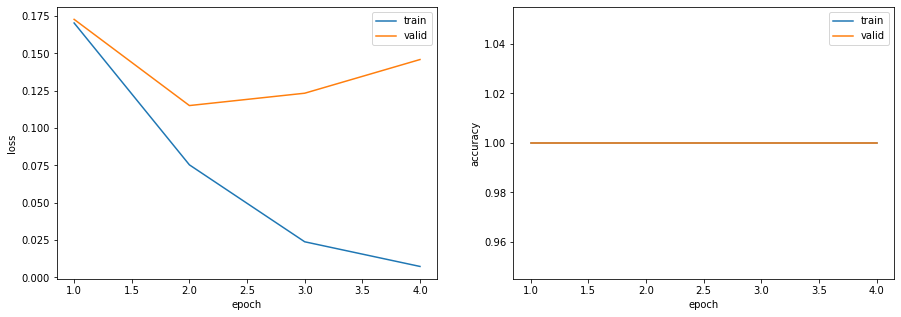

In [13]:
# ログの可視化
x_axis = [x for x in range(1, len(log['train']) + 1)]
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(x_axis, np.array(log['train']).T[0], label='train')
ax[0].plot(x_axis, np.array(log['valid']).T[0], label='valid')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()
ax[1].plot(x_axis, np.array(log['train']).T[1], label='train')
ax[1].plot(x_axis, np.array(log['valid']).T[1], label='valid')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend()
plt.show()

In [19]:
# 正解率の算出
dataloader_train = DataLoader(dataset_train, batch_size=1, shuffle=False)
dataloader_valid = DataLoader(dataset_valid, batch_size=1, shuffle=False)
dataloader_test = DataLoader(test, batch_size=1, shuffle=False)

print(f'正解率（学習データ）：{calculate_loss_and_accuracy(model, dataloader_train, device)[1]:.3f}')
print(f'正解率（検証データ）：{calculate_loss_and_accuracy(model, dataloader_valid, device)[1]:.3f}')
#print(f'正解率（評価データ）：{calculate_loss_and_accuracy(model, dataloader_test, device)[1]:.3f}')

正解率（学習データ）：1.000
正解率（検証データ）：1.000


In [14]:
class NewsDataset(Dataset):
  def __init__(self, X, tokenizer, max_len):
    self.X = X
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):  # len(Dataset)で返す値を指定
    return len(self.X)

  def __getitem__(self, index):  # Dataset[index]で返す値を指定
    text = self.X[index]
    inputs = self.tokenizer.encode_plus(
      text,
      add_special_tokens=True,
      max_length=self.max_len,
      truncation=True,
      padding='max_length'
    )
    ids = inputs['input_ids']
    mask = inputs['attention_mask']

    return {
      'ids': torch.LongTensor(ids),
      'mask': torch.LongTensor(mask)
    }
dataset_test = NewsDataset(test['text'], tokenizer, MAX_LEN)
dataloader_test = DataLoader(dataset_test, batch_size=1, shuffle=False)

In [15]:
model.eval()
pred_list = []
with torch.no_grad():
  for data in dataloader_test:
    # デバイスの指定
    ids = data['ids'].to(device)
    mask = data['mask'].to(device)

    # 順伝播
    outputs = model(ids, mask)

    pred = torch.argmax(outputs, dim=-1).cpu().numpy()

    pred_list.append(pred)
print(pred_list)

[array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), arr

In [16]:
pred_list_new = [pred_list[i][0] for i in range(len(pred_list))]

In [17]:
set(pred_list_new)

{0}

In [25]:
valid['label'].value_counts()

0    991
1     61
Name: label, dtype: int64

In [26]:
train['label'].value_counts()

0    3959
1     245
Name: label, dtype: int64